In [15]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special

## 1. Analytical solution of dispersion relation

- Expression:
$$\hat{\omega} =  (\frac{1}{2} + i\frac{\sqrt{3}}{2})\mid(k_y \lambda_{i})^{1/3} \left(\frac{L_{T}}{\lambda_{i}}\right)^{-1/3} \left(\frac{T_e}{T_i}\right)^{-1/3}(k_z \lambda_{i})^{2/3} \mid$$ 

- Considered parameters:
    - $k_y \lambda_{i}=0.1$
    - $\frac{L_{T}}{\lambda_{i}}=10$
    - $\frac{T_e}{T_i}=10$


In [6]:
# calculate analytical solution

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -2, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega analytical
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))

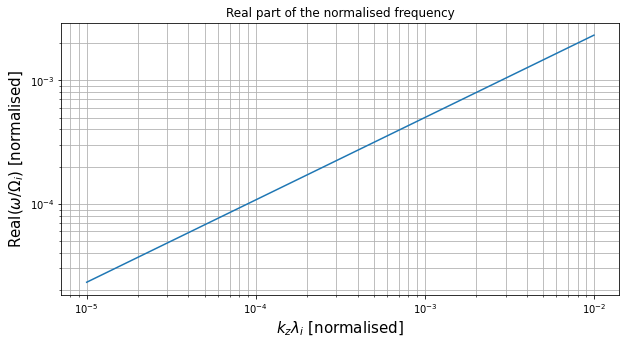

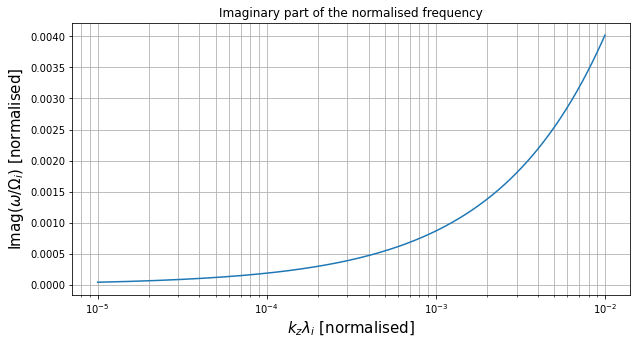

In [7]:
# plot analytical solution

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part
plt.plot(k_z_lambda, omega_analytical.real)
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

# plot imaginary part
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda, omega_analytical.imag)
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

## 2. Normalised dispersion relation for the first (the more simple) numerical solution

$\hat{\omega^3} + \hat{\omega^2}(k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1}-\frac{7}{6}\hat{\omega}(k_z \lambda_i)^2+(k_z \lambda_i)^2 (k_y \lambda_i) \left(\frac{L_T}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1}-\frac{1}{15}(k_z \lambda_i)^2 (k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1}=0 $


- $\hat{\omega}=\frac{\omega}{\Omega_i}$
- $T_e/T_i = 10$
- $k_y \lambda_i = 0.1$
- $L_n / \lambda_i = 10^5$
- $L_T / \lambda_i = 10$

In [4]:
# define a function for the dispersion relation
def first_dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    
    # return the expression for the dispersion relation
    return x**3 + x**2 *k_y_lambda*(L_n_lambda)**(-1) - (7/6)*x*(k_z_lambda)**2 + (k_z_lambda)**2 *k_y_lambda*(L_T_lambda)**(-1)*temp_ratio**(-1) - (1/15)*(k_z_lambda)**2 *(k_y_lambda)*(L_n_lambda)**(-1)
    

In [5]:
# calculate the first numerical solution

import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

first_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    first_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = first_omega_numerical[k_z_lambda_list.index(i)-1] - first_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = first_omega_numerical[k_z_lambda_list.index(i)-1] + first_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    first_omega_numerical.append(solution.root)

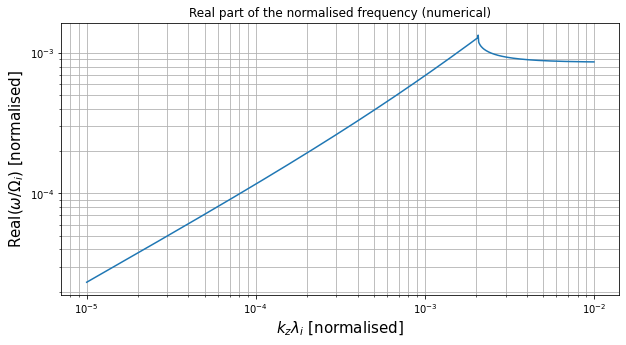

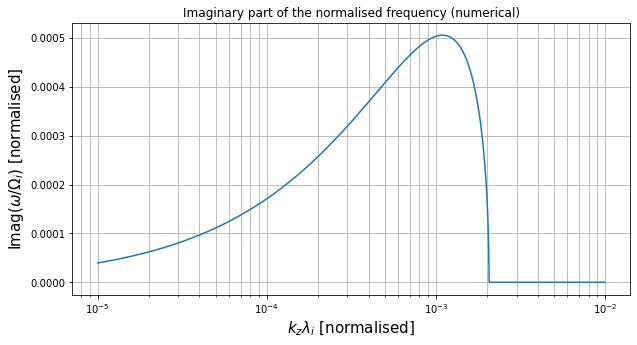

In [8]:
# plot first numerical solution

# turn it into a numpy array again
first_omega_numerical = np.asarray(first_omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, first_omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, first_omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

## 3.  Normalised dispersion relation for the second (the more complex) numerical solution

$$-\hat{\omega}^2W\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1} + 2\hat{\omega}(2 + W\Lambda_0-\Lambda_0)(k_z \lambda_i)^2+2W\Lambda_0(k_y \lambda_i) \left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0(k_y \lambda_i) \left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_n}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2+2W\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0 (k_y \lambda_i)\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2+2W\Lambda_0 (k_y \lambda_i)^3\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 -2\Lambda_0 (k_y \lambda_i)^3\left(\frac{T_e}{T_i}\right)^{-1}\left(\frac{L_T}{\lambda_i}\right)^{-1}(k_z \lambda_i)^2 = 0$$

In [26]:
# define a function for the dispersion relation
def second_dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    bessel = special.ive(0, k_y_lambda**2) # order 0 bessel function
    W = special.wofz(x/k_z_lambda) # dispersion function 

    omega_t = temp_ratio**(-1) * k_y_lambda * L_T_lambda**(-1)
    omega_n = k_y_lambda * L_n_lambda**(-1)
    
    # return the expression for the dispersion relation
    return -x**2 *omega_t * W * bessel + 2 * x *k_z_lambda**2 *(2 + W*bessel-bessel) + 2*temp_ratio**(-1)*omega_n*k_z_lambda**2 *W*bessel - 2*temp_ratio**(-1)*omega_n*k_z_lambda**2 *bessel + 2*omega_t *k_z_lambda**2 *W*bessel - 2*omega_t *k_z_lambda**2 *bessel + 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *W*bessel - 2*omega_t *k_z_lambda**2 *k_y_lambda**2 *bessel

In [27]:
# calculate the second numerical solution

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

second_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:50]:
    # find the root
    solution = optimize.root_scalar(second_dispersion_relation, x0 = 0.001+0.001j, 
                                     x1 = 0.002+0.002j, args=i, method='secant')
    # save the root
    second_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[50:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = second_omega_numerical[k_z_lambda_list.index(i)-1] + second_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = second_omega_numerical[k_z_lambda_list.index(i)-1] - second_omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(second_dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    second_omega_numerical.append(solution.root)

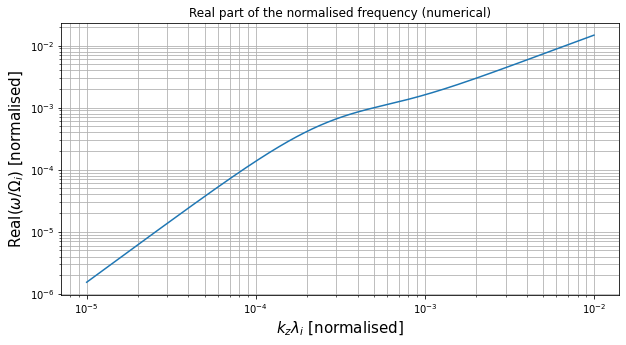

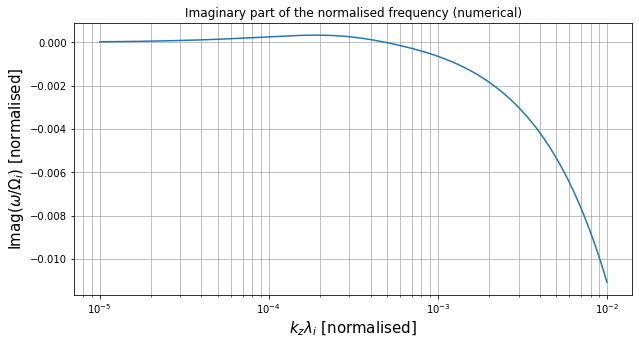

In [28]:
# plot second numerical solution

# turn it into a numpy array again
second_omega_numerical = np.asarray(second_omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, second_omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, second_omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

## 4. Plot the three solutions together

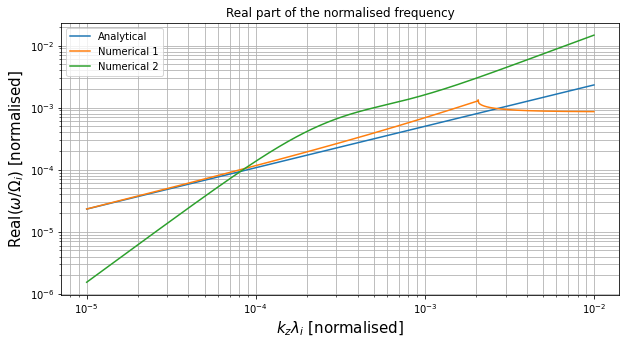

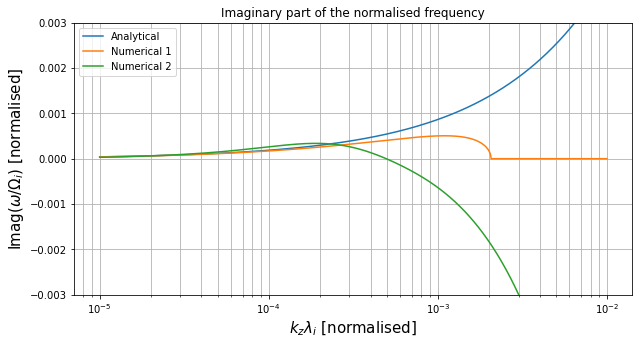

In [52]:
# first plot 
plt.subplots(figsize=(10,5))

# plot real part of the solutions

# plot the analytical solution
plt.plot(k_z_lambda, omega_analytical.real, label='Analytical')
# plot the first numerical solution
plt.plot(k_z_lambda, first_omega_numerical.real, label='Numerical 1')
# plot the second numerical solution
plt.plot(k_z_lambda, second_omega_numerical.real, label='Numerical 2')

# set the plot axis etc.
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# second plot
plt.subplots(figsize=(10,5))

# plot imaginary part of the solutions

# plot the analytical solution
plt.plot(k_z_lambda, omega_analytical.imag, label='Analytical')
# plot the first numerical solution
plt.plot(k_z_lambda, first_omega_numerical.imag, label='Numerical 1')
# plot the second numerical solution
plt.plot(k_z_lambda, second_omega_numerical.imag, label='Numerical 2')

# set the plot axis etc.
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.ylim(-0.003, 0.003) # set y-axis limits
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()